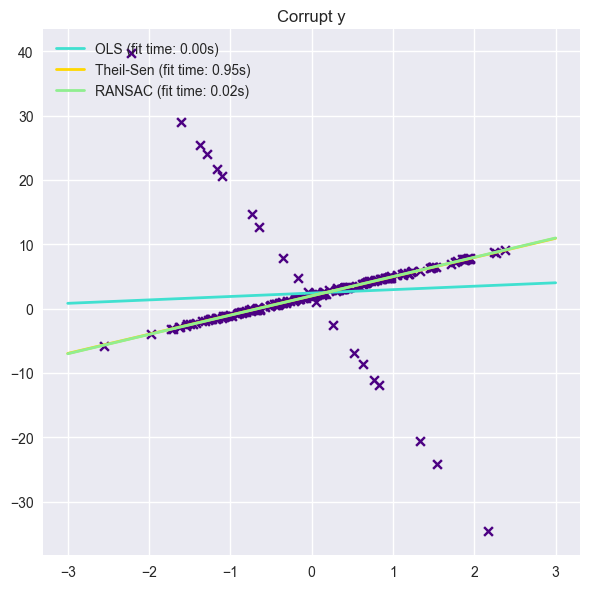

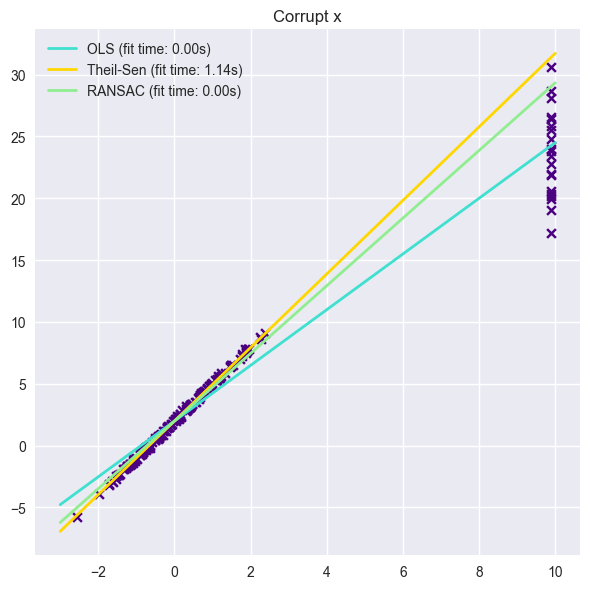

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入时间库
import time
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入回归器
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 构建模型
estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
]
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2
# 生成数据集，离群值在X
np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]
# 开始绘图
fig1, ax = plt.subplots(figsize=(6,6), tight_layout=True)
ax.scatter(x, y, color="indigo", marker="x", s=40)
# 预测点的X
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    # 模型拟合
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    # 预测
    y_pred = estimator.predict(line_x.reshape(2, 1))
    ax.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )
ax.legend(loc="upper left")
ax.set_title("Corrupt y")
plt.show()
fig1.savefig("../codeimage/code28.pdf")

# 生成数据集，离群值在y
np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]
# 开始绘图
fig2, ax = plt.subplots(figsize=(6,6), tight_layout=True)
ax.scatter(x, y, color="indigo", marker="x", s=40)
# 预测点的X
line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    # 模型拟合
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    # 预测
    y_pred = estimator.predict(line_x.reshape(2, 1))
    ax.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )
ax.legend(loc="upper left")
ax.set_title("Corrupt x")
plt.show()
fig2.savefig("../codeimage/code29.pdf")
